# Майнор "Прикладные задачи анализа данных"
## Домашнее задание 2 [10 баллов] до 23:59 22.03.2018. Предсказание цены акции по экономическим новостям

### Выполняли: Якименко Александра и Кузнецов Евгений

В этом домашнем задании вы попытаетесь предсказать рост цены акции компании Газпром по новостям о компании. Домашнее задание состоит из трех частей:
1. Предварительная обработка текстов и эксплоративный анализ
2. Baseline алгоритм
3. Творческая часть

Все три части можно считать независимыми – вы можете сделать одну или две из них, однако мы настоятельно советуем выполнить все три. Все инструкции по выполнению домашнего задания – ниже. 



Входные данные:
* Новости о компании "Газпром", начиная с 2010 года
* Стоимость акций компании "Газпром" на ММВБ, начиная с 2010 года
    * цена открытия (Open)
    * цена закрытия (ClosingPrice)
    * максимальная цена за день (DailyHigh)
    * минимальная цена за день (DailyLow) 
    * объем бумаг (VolumePcs)


In [1]:
import pandas as pd

pr_all = pd.read_csv('gazprom_prices.csv', sep=';')
pr_all.ClosingPrice = pr_all.ClosingPrice.apply(lambda val: float(val.replace(',','.')))
pr_all['ClosingPrice_bin'] =  (pr_all.ClosingPrice/pr_all.ClosingPrice.shift(1) >= 1)
pr_all.head(5)

,Date,Open,ClosingPrice,DailyHigh,DailyLow,VolumePcs,ClosingPrice_bin
0,08.12.2017,"133,43000",132.60,"133,90000","132,00000",16037970,False
1,07.12.2017,"133,70000",133.02,"133,87000","132,81000",18198430,True
2,06.12.2017,"133,33000",134.00,"134,29000","132,91000",14641730,True
3,05.12.2017,"133,48000",133.65,"133,99000","132,78000",12684800,False
4,04.12.2017,"133,01000",133.77,"134,00000","131,93000",17818980,True


In [2]:
from datetime import datetime, date
import numpy as np

def get_price(d):
    values = pr_all[pr_all.Date == d].ClosingPrice_bin
    return np.nan if len(values) == 0 else values.iloc[0]
    
pd.set_option('max_colwidth',400)
df = pd.read_csv('texts.csv')
df['date_val'] = df.date.apply(lambda t: datetime.strptime(t, '%d.%m.%Y').date())
df['ClosingPrice_bin'] = df.date.apply(get_price)
df = df.dropna()
df

,date,text,date_val,ClosingPrice_bin
0,09.11.2017,"Компания рассчитывает на решение по газовому спору с Украиной до конца декабря «Газпром» ожидает решения Стокгольмского арбитража по транзитному спору с украинским «Нафтогазом» не позднее февраля 2018 года, хотя раньше компания прогнозировала, что это произойдет до 30 ноября. Решение по взаимным искам об условиях поставок газа на Украину, по мнению монополии, суд может принять на месяц раньше ...",2017-11-09,False
1,08.11.2017,"Как и предполагал “Ъ”, «Газпром», воспользовавшись жалобами иностранных партнеров на налогообложение добычных проектов в РФ, смог добиться снижения налога на добычу полезных ископаемых (НДПИ) для своих ачимовских залежей почти до уровня независимых производителей газа. Эта льгота распространится не только на СП «Газпрома» с OMV и Wintershall, но и на структуры монополии, разрабатывающие место...",2017-11-08,True
2,01.11.2017,"Новая редакция американских санкций ставит под угрозу зарубежные нефтяные проекты российских компаний. Теперь американским гражданам и компаниям запрещено не только так или иначе участвовать в разработке определенных типов нефтяных месторождений в России. Они не смогут помогать российским компаниям, в том числе «Роснефти», ЛУКОЙЛу и «Газпром нефти», в аналогичных проектах за рубежом, которые ...",2017-11-01,True
3,30.10.2017,"Как стало известно “Ъ”, известный на рынке риск-менеджер и IT-специалист Вадим Кулик выходит на работу в Газпромбанк. О его назначении зампредом правления будет объявлено в начале недели. Господин Кулик хорошо знаком с работой в госбанках — с 2004 года он работал в ВТБ 24, а затем в Сбербанке. В Газпромбанке перед топ-менеджером будет стоять амбициозная задача — технологическая реформа «крайн...",2017-10-30,True
4,23.10.2017,"НОВАТЭК, который через пять лет собирается запустить на Камчатке крупный перегрузочный терминал для СПГ, готов решить проблему обеспечения региона газом. Пока газ в край поставляет «Газпром», но его не хватает. Местные месторождения монополии дают только 400 млн кубометров газа, а спрос уже сейчас составляет более 700 млн кубометров газа.\n Вопреки уже де факто сложившейся практике дотации пр...",2017-10-23,True
5,20.10.2017,"Российским прокатчикам второй раз за год пришлось разводить схожие по тематике картины по разным датам. Предполагалось, что два фильма о Древней Руси, «Скиф» Сергея Сельянова и «Легенда о Коловрате» «Газпром-медиа», выйдут 23 и 30 ноября соответственно, но в итоге «Скиф» перенесен на январь. Прокатчики договорились без конфликта, хотя в прошлый раз определять очередность фильмов о космосе «Са...",2017-10-20,False
6,13.10.2017,"«Газпром» может подписать контракт со Словенией на поставки газа на ближайшие пять лет в конце текущего — начале следующего годов. Его условия стороны обсуждают уже несколько месяцев, но не торопятся с заключением. Последний раз условия соглашения пересматривались в 2016 году. Поставки в страну составляют около 0,5 млрд кубометров.",2017-10-13,False
7,05.10.2017,"«Газпром нефть», пробурившая первую скважину на Аяшском участке шельфа Сахалина, обнаружила крупное месторождение. Геологические запасы оценены в 255 млн тонн, извлекаемые — в 70–80 млн тонн, но эксперты осторожно замечают, что об экономической эффективности пока говорить рано. Предположительно, нефтекомпания будет искать партнера в проект, чтобы разделить риски. По словам источников “Ъ”, уча...",2017-10-05,True
8,04.10.2017,"Спутниковый оператор «НТВ-плюс» в последнее время заново искал свое место на рынке: несколько лет назад он резко снизил цены, но так и не смог догнать конкурентов по абонентской базе. С прошлого года компания перестала производить собственные телеканалы — теперь ими занимаются «Матч ТВ» и другие структуры «Газпром-медиа». О том, какие новые сегменты для роста находит компания, “Ъ” рассказал г...",2017-10-04,False
9,29.09.2017,"Как стало известно “Ъ”, конкуренты начинают разбирать дилерские центры проблемной ГК «Независимость»: центр «Белая дача», продававший BMW, 

## Часть 1. Вводная [3 балла]

Проведите предобработку текстов: если считаете нужным, выполните токенизацию, приведение к нижнему регистру, лемматизацию и/или стемминг. Ответьте на следующие вопросы:
* Есть ли корреляция между средней длинной текста за день и ценой закрытия?
* Есть ли корреляция между количеством упоминаний Алексея Миллера  и ценой закрытия? Учтите разные варианты написания имени.
* Упоминаний какого газопровода в статьях больше: 
    * "северный поток"
    * "турецкий поток"?
* Кого упоминают чаще:
    * Алексея Миллера
    * Владимира Путина?
* О каких санкциях пишут в статьях?

## Проведем предварительную предобработку данных:

In [3]:
from nltk.corpus import stopwords
import re
import pymorphy2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import nltk

In [4]:
morph = pymorphy2.MorphAnalyzer()
stop_words = stopwords.words('russian')

Убираем пунктуацию, приводим слова к нижнему регистру, приводим к нормальной форме, убираем стоп-слова

In [5]:
def tokenize_text(text):
    tokens = re.sub("[^\w]", " ", text).split()
    tokens = [t.lower() for t in tokens]
    tokens = [morph.parse(word)[0].normal_form for word in tokens]
    tokens = [i for i in tokens if (i not in stop_words)]    
    return ' '.join(tokens)

In [6]:
#обработанные новости
text_tokens = df.text.apply(tokenize_text)

In [7]:
#склеенные в текст
all_texts_array = np.array(df['text']).ravel()
all_texts = str()
for t in all_texts_array:
    all_texts += t

In [8]:
#разбиваем все тексты
prog = re.compile('[А-Яа-я]+')
all_texts = prog.findall(all_texts.lower())
all_texts = [morph.parse(token)[0].normal_form for token in all_texts if not token in stopwords.words('russian')]

In [9]:
all_texts 

['компания',
 'рассчитывать',
 'решение',
 'газовый',
 'спор',
 'украина',
 'конец',
 'декабрь',
 'газпром',
 'ожидать',
 'решение',
 'стокгольмский',
 'арбитраж',
 'транзитный',
 'спор',
 'украинский',
 'нафтогаз',
 'поздний',
 'февраль',
 'год',
 'хотя',
 'ранний',
 'компания',
 'прогнозировать',
 'это',
 'произойти',
 'ноябрь',
 'решение',
 'взаимный',
 'иск',
 'условие',
 'поставка',
 'газа',
 'украина',
 'мнение',
 'монополия',
 'суд',
 'принять',
 'месяц',
 'ранний',
 'декабрь',
 'год',
 'предполагать',
 'ъ',
 'газпром',
 'воспользоваться',
 'жалоба',
 'иностранный',
 'партнёр',
 'налогообложение',
 'добычный',
 'проект',
 'рф',
 'смочь',
 'добиться',
 'снижение',
 'налог',
 'добыча',
 'полезный',
 'ископаемое',
 'ндпить',
 'свой',
 'ачимовский',
 'залежь',
 'уровень',
 'независимый',
 'производитель',
 'газа',
 'этот',
 'льгота',
 'распространиться',
 'сп',
 'газпром',
 'структура',
 'монополия',
 'разрабатывать',
 'месторождение',
 'запас',
 'триллион',
 'кубометр',
 'газа',
 '

## Есть ли корреляция между средней длинной текста за день и ценой закрытия?

Не на все даты есть новости, поэтому запишем длину текстов в дни, когда новостей не было равной 0

In [11]:
from functools import reduce

df_length = pd.DataFrame()
df_length['date'] = pr_all.Date
df_length['text_length'] = df_length.date.apply(lambda date: reduce(lambda a, t: a + len(t), df[df.date==date].text, 0))
df_length['close_price'] = pr_all.ClosingPrice

corr_1 = df_length['text_length'].corr(df_length['close_price'])
corr_2 = df_length[df_length.text_length > 0]['text_length'].corr(df_length[df_length.text_length > 0]['close_price'])
print("Корреляция между ценой и длинной текстов с учетом отсутствия новостей:", corr_1, "\nТолько тогда когда были новости:", corr_2)

Корреляция между ценой и длинной текстов с учетом отсутствия новостей: -0.04822447506 
Только тогда когда были новости: 0.0141583946213


Получается, что корреляция в любом случае близка к 0, то есть зависимости почти нет.

Датасеты с выкинутыми несовпаденями.

In [13]:
indexes = []
prices = pr_all
for i, d in enumerate(pr_all['Date']):
    if d not in set(df['date']):
        indexes.append(i)

prices = pr_all.drop(indexes)
prices['ClosingPrice'] = prices.ClosingPrice

indexes = []
for i, d in enumerate(df['date']):
    if d not in set(prices['Date']):
        indexes.append(i)
df_new = df
df_new["text"] = text_tokens
df_new = df_new.drop(indexes)

Построим зависимость цены и количества слов в новости за день на графике

In [14]:
words_num = np.zeros(df_new.shape[0])
for i, t in enumerate(df_new['text']):
    words_num[i] = len(t.split())
price = prices['ClosingPrice']

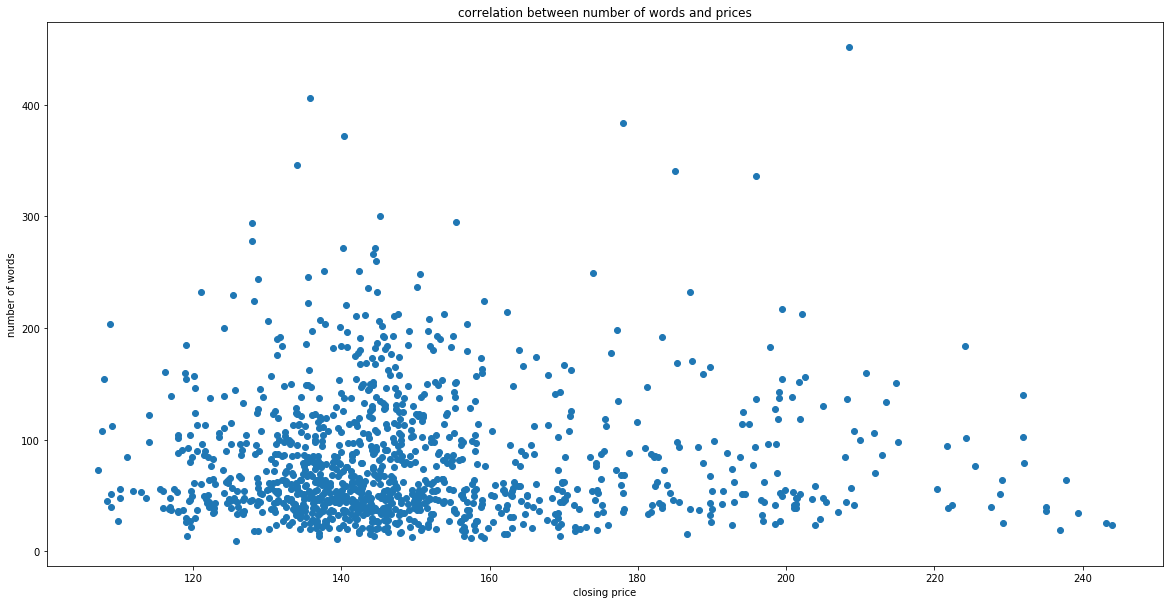

In [15]:
plt.figure(figsize = (20,10))
plt.scatter(price, words_num)
plt.xlabel("closing price")
plt.ylabel("number of words")
plt.title("correlation between number of words and prices")
plt.show()

С учетом отсутствия новостей

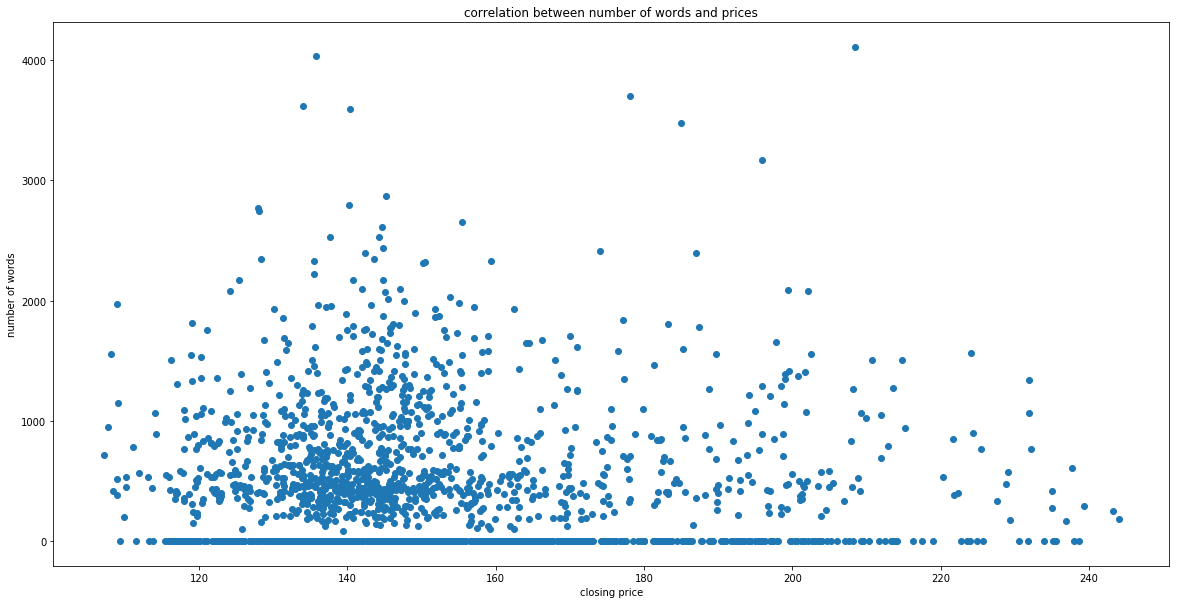

In [16]:
plt.figure(figsize = (20,10))
plt.scatter(df_length['close_price'], df_length['text_length'])
plt.xlabel("closing price")
plt.ylabel("number of words")
plt.title("correlation between number of words and prices")
plt.show()

Явной связи не прослеживается, большие новости были как при малый ценах так и больших, и наоборот.

## Есть ли корреляция между количеством упоминаний Алексея Миллера и ценой закрытия?

In [17]:
m_frequency = np.zeros(df_new.shape[0])
for i, t in enumerate(df_new['text']):
    m_frequency[i] = len(re.findall(r'миллер', t,re.U))
price = prices['ClosingPrice']

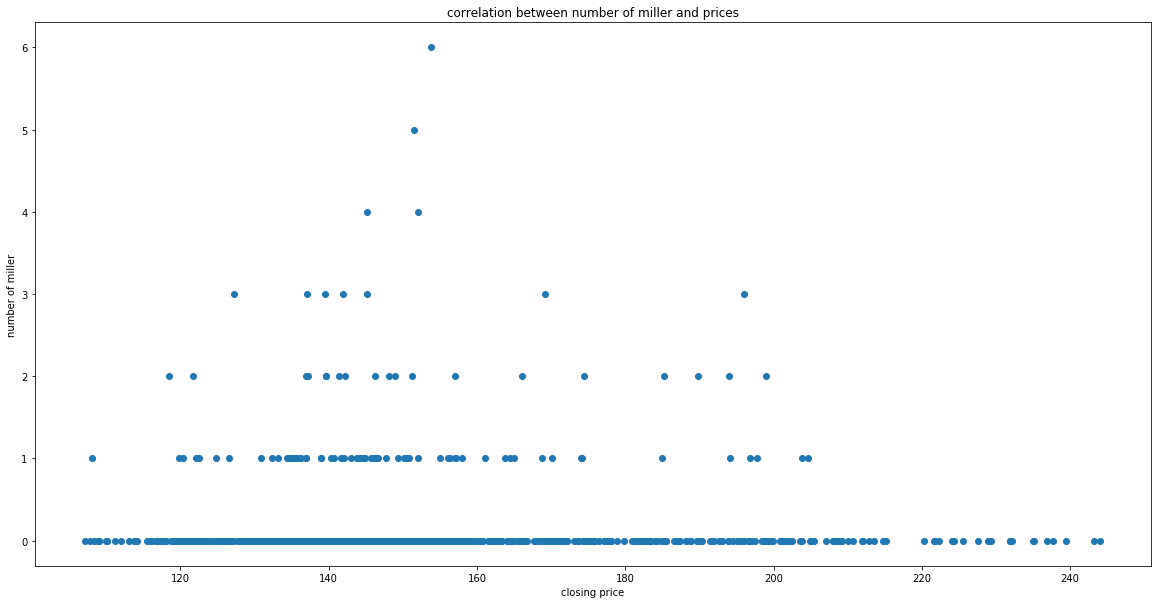

In [18]:
plt.figure(figsize = (20,10))
plt.scatter(price, m_frequency)
plt.xlabel("closing price")
plt.ylabel("number of miller")
plt.title("correlation between number of miller and prices")
plt.show()

In [19]:
df_m_freq = pd.DataFrame()
df_m_freq['freq'] = m_frequency

In [20]:
corr_3 = df_m_freq['freq'].corr(prices['ClosingPrice'])
#corr_4 = df_m_freq[df_length.text_length > 0]['freq'].corr(df_length[df_length.text_length > 0]['close_price'])
print("Корреляция между ценой и упоминаний миллера с учетом отсутствия новостей:", corr_3)#, "\nТолько тогда когда были новости:", corr_4)

Корреляция между ценой и упоминаний миллера с учетом отсутствия новостей: 0.0393038554791


Аналогично, корреляция близка к 0, зависимости нет.

## Упоминаний какого газопровода в статьях больше

In [21]:
north = 0
turkey = 0
for i, t in enumerate(df_new['text']):
    j = len(re.findall(r'северный\sпоток', t, re.U))
    if j != 0:
        north += j
    j = len(re.findall(r'турецкий\sпоток', t, re.U))
    if j != 0:
        turkey += j

In [22]:
print("Турецкий поток:", turkey, " Северный поток:", north)

Турецкий поток: 39  Северный поток: 15


## Кого упоминают чаще

In [23]:
miller = 0
putin = 0
for i, t in enumerate(df_new['text']):
    j = len(re.findall(r'миллер', t, re.U))
    if j != 0:
        miller += j
    j = len(re.findall(r'путин', t, re.U))
    if j != 0:
        putin += j

In [24]:
print("Упомянули владимира путина:", putin, " Упомянули алексея миллера:", miller)

Упомянули владимира путина: 71  Упомянули алексея миллера: 147


Проверим результат используя FrecDist

In [25]:
#all_texts_array = np.array( df_new['text']).ravel()
#all_texts = str()
#for t in all_texts_array:
#    all_texts +=t

In [26]:
#самые упоминаемые слова
freq1 = nltk.FreqDist(all_texts)
freq1.most_common(20)

[('газпром', 3440),
 ('компания', 1368),
 ('год', 1360),
 ('газа', 945),
 ('миллиард', 895),
 ('нефть', 829),
 ('который', 734),
 ('российский', 658),
 ('рубль', 634),
 ('проект', 519),
 ('поставка', 451),
 ('сообщить', 446),
 ('цена', 433),
 ('миллион', 377),
 ('рынок', 361),
 ('газ', 360),
 ('монополия', 346),
 ('украина', 338),
 ('россия', 328),
 ('газовый', 327)]

In [27]:
print("Упомянули владимира путина:", freq1["путин"], "Упомянули алексея миллера:", freq1["миллер"] )

Упомянули владимира путина: 71 Упомянули алексея миллера: 147


Цифры немного отличаются, но очевидно, что Миллера упоминают чаще

In [28]:
bg = list(nltk.bigrams(all_texts))
bgfd = nltk.FreqDist(bg)
bgfd.most_common(20)

[(('газпром', 'нефть'), 671),
 (('миллиард', 'рубль'), 457),
 (('поставка', 'газа'), 181),
 (('газпром', 'медиа'), 178),
 (('оао', 'газпром'), 152),
 (('совет', 'директор'), 124),
 (('алексей', 'миллер'), 122),
 (('говориться', 'сообщение'), 120),
 (('миллиард', 'кубометр'), 115),
 (('компания', 'газпром'), 100),
 (('российский', 'газа'), 98),
 (('куб', 'метр'), 98),
 (('российский', 'компания'), 92),
 (('год', 'газпром'), 89),
 (('российский', 'газовый'), 86),
 (('председатель', 'правление'), 85),
 (('цена', 'газ'), 83),
 (('стать', 'известно'), 74),
 (('миллиард', 'куб'), 71),
 (('известно', 'ъ'), 70)]

In [29]:
print("Турецкий поток:", bgfd[("турецкий", "поток")], " Северный поток:", bgfd[("северный", "поток")])

Турецкий поток: 39  Северный поток: 15


Опять же, результат подтвердился, турецкий поток фигурирует в текстах чаще

## О каких санкциях пишут в статьях?

Отберем тексты в которых упоминаются санкции и выделим для них топики

In [30]:
sanction_text = []
for i, t in enumerate(df_new['text']):
    j = len(re.findall(r'санкция', t, re.U))
    if j != 0:
        sanction_text.append(t)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
#примениМ коллекции документов CountVectorizer
cv = CountVectorizer()

transformed_dataset = cv.fit_transform(sanction_text)

In [32]:
tf_feature_names = cv.get_feature_names()
#assert len(tf_feature_names) == 100

In [33]:
lda = LatentDirichletAllocation(n_topics=20, max_iter=50, learning_method='batch')

In [34]:
#обучим lda
lda.fit(transformed_dataset)

C:\Users\user\Anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
             evaluate_every=-1, learning_decay=0.7,
             learning_method='batch', learning_offset=10.0,
             max_doc_update_iter=100, max_iter=50, mean_change_tol=0.001,
             n_components=10, n_jobs=1, n_topics=20, perp_tol=0.1,
             random_state=None, topic_word_prior=None,
             total_samples=1000000.0, verbose=0)

In [35]:
def print_top_words(model, feature_names, n_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print ('Topic {}:'.format(topic_idx))
        print (' '.join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

In [36]:
n_top_words = 10
print_top_words(lda, tf_feature_names, n_top_words)

Topic 0:
нефть газпром партнёр repsol проект россия санкция эксперт пока мочь
Topic 1:
газпром контракт компания рынок это поставка год украина санкция также
Topic 2:
год компания газпром российский совет мочь втб директор председатель член
Topic 3:
газпромбанк возможность получить кредит попасть список акция вэб втб рамка
Topic 4:
банка гражданин обслуживать газпромбанк российский крупный санкция мочь сбербанк россия
Topic 5:
европейский строительство газпромбанк санкция газа газпром крупный новый спг завод
Topic 6:
нефть санкция газпром проект роснефть российский стать рынок западный shell
Topic 7:
газпром газопровод источник поток часть план продление stream строить турецкий
Topic 8:
газпром нефть год компания миллиард расследование санкция газа сообщить рубль
Topic 9:
газпром год газа миллион поставка отчёт миллиард 2015 украина 2014
Topic 10:
яцинявичен инфраструктура иностранный инстанция институт интервью интерес интересоваться интерфакс инфляция
Topic 11:
газпром российский сан

## Часть 2. Классификационная [3 балла]
Вам предстоит решить следующую задачу: по текстам новостей за день определить, вырастет или понизится цена закрытия.
Для этого:
* бинаризуйте признак "цена закрытия":  новый признак ClosingPrice_bin равен 1, если по сравнению со вчера цена не упала, и 0 – в обратном случаея;
* составьте бучающее и тестовое множество: данные до начала 2016 года используются для обучения, данные с 2016 года и позже – для тестирования.

Таким образом, в каждлый момент времени мы знаем: 
* ClosingPrice_bin – бинарый целевой признак
* слова из статей, опубликованных в этот день – объясняющие признаки

В этой части задания вам нужно сделать baseline алгоритм и попытаться его улучшить в следующей части. 

Используйте любой известный вам алгоритм классификации текстов для того, Используйте $tf-idf$ преобразование, сингулярное разложение, нормировку признакого пространства и любые другие техники обработки данных, которые вы считаете нужным. Используйте accuracy и F-measure для оценки качества классификации. Покажите, как  $tf-idf$ преобразование или сингулярное разложение или любая другая использованная вами техника влияет на качество классификации.
Если у выбранного вами алгоритма есть гиперпараметры (например, $\alpha$ в преобразовании Лапласа для метода наивного Байеса), покажите, как изменение гиперпараметра влияет на качество классификации.

In [37]:
random_state = 666 # !!! MAGIC !!!

#### приводим весь текст к нижнему регистру, отбираем только русские слова, выполняем лемминг, удаляем стоп-слова

In [38]:
from nltk.corpus import stopwords
import re
import pymorphy2
morph = pymorphy2.MorphAnalyzer()
stop_words = stopwords.words('russian')

def valid_word(word):
    return np.sum([letter in 'абвгдеёжзийклмнопрстуфхцчшщъыьэюя' for letter in word]) == len(word)

def text_2_tokens(text):
    tokens = re.sub("[^\w]", " ",  text).split()
    tokens = [t.lower() for t in tokens]
    tokens = [morph.parse(word)[0].normal_form for word in tokens]
    tokens = [i for i in tokens if ( i not in stop_words )]
    tokens = [i for i in tokens if valid_word(i)]
    return ' '.join(tokens)

tokens = df.text.apply(text_2_tokens)
tokens.head()

0                                                                 компания рассчитывать решение газовый спорый украина конец декабрь газпром ожидать решение стокгольмский арбитраж транзитный спорый украинский нафтогаз поздний февраль год хотя ранний компания прогнозировать это произойти ноябрь решение взаимный иск условие поставка газа украина мнение монополия суд мочь принять месяц ранний декабрь год
1    предполагать ъ газпром воспользоваться жалоба иностранный партнёр налогообложение добычный проект рф смочь добиться снижение налог добыча полезный ископаемое ндпить свой ачимовский залежь уровень независимый производитель газа льгота распространиться сп газпром структура монополия разрабатывать месторождение запас триллион кубометр газа расчёт ъ это привести год платёж ндпить газпром ачимовски...
2    новый редакция американский санкция ставить угроза зарубежный нефтяной проект российский компания американский гражданин компания запретить иначе участвовать разработка определённый тип

#### присваиваем метки нашим словам для последующей векторизации

In [39]:
train_corpus = tokens[df.date_val <  date(2016,1,1)].values
test_corpus  = tokens[df.date_val >= date(2016,1,1)].values

all_words = ' '.join(train_corpus).split()
dictionary = set(all_words)
all_words.append('')

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(all_words)

def transform(text):
    tokens = text.split()
    tokens = [t for t in tokens if (t in dictionary)]
    return le.transform(tokens)

train_corpus = np.array([transform(text) for text in train_corpus])
test_corpus  = np.array([transform(text) for text in test_corpus ])

print('размер словаря: ', len(le.classes_))

размер словаря:  6171


#### В качестве модели используем LSTM
#### Нам понадобится Keras c Tensorflow в качестве бекэнда

In [40]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence

Using TensorFlow backend.


#### Создаем обучающую и тестовую выборки

In [41]:
max_article_length = np.max([len(x) for x in train_corpus])

X_train = sequence.pad_sequences(train_corpus, maxlen=max_article_length)
X_test  = sequence.pad_sequences(test_corpus , maxlen=max_article_length)

Y_train = df[df.date_val <  date(2016,1,1)].ClosingPrice_bin.as_matrix().astype(bool)
Y_test  = df[df.date_val >= date(2016,1,1)].ClosingPrice_bin.as_matrix().astype(bool)

X_train.shape, X_test.shape

((901, 410), (258, 410))

In [42]:
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score

def score(model, X, Y, dataset):
    Y_pred = model.predict_classes(X)
    Y_prob = model.predict(X)
    print('accuracy (',dataset,'): ', accuracy_score(Y, Y_pred))
    print('f-measure (',dataset,'): ', f1_score(Y, Y_pred))
    print('roc_auc (',dataset,'): ', roc_auc_score(Y, Y_prob))

#### Строим и обучаем нашу модель
##### так как размер выборки небольшой, то используем малое количество LSTM нейронов и задаем небольшую размерность embedding

In [43]:
from tensorflow import set_random_seed
set_random_seed(random_state)
np.random.seed(random_state)

model = Sequential()
model.add(Embedding(
    len(le.classes_), 
    10, 
    input_length=max_article_length
))
model.add(LSTM(2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

model.fit(X_train, Y_train, epochs=1, batch_size=64)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 410, 10)           61710     
_________________________________________________________________
lstm_1 (LSTM)                (None, 2)                 104       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 3         
Total params: 61,817
Trainable params: 61,817
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
901/901 [==============================] - 16s 18ms/step - loss: 0.6926 - acc: 0.5216


accuracy ( Train ):  0.586015538291
f-measure ( Train ):  0.710628394104
roc_auc ( Train ):  0.716749876421
accuracy ( Test ):  0.542635658915
f-measure ( Test ):  0.687830687831
roc_auc ( Test ):  0.45475308642


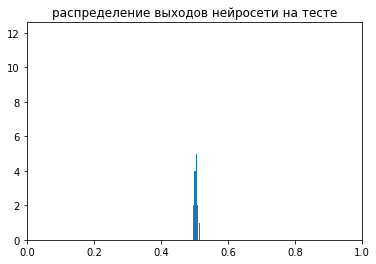

In [44]:
score(model, X_train, Y_train, "Train")
score(model, X_test, Y_test, "Test")

%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(model.predict(X_test), bins=100)
plt.xlim((0,1))
plt.title('распределение выходов нейросети на тесте')
plt.show()

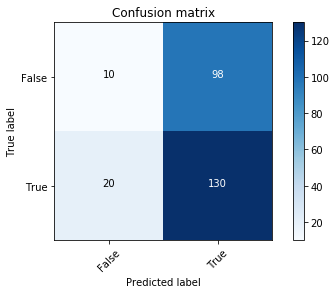

In [45]:
from sklearn import metrics
import itertools

def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plot_confusion_matrix(metrics.confusion_matrix(Y_test,model.predict_classes(X_test)), classes=['False', 'True'])

### Не смотря на высокие результаты по метрикам accuracy, f1-score, этот классификатор имеет плохое качество, т.к. он отнес всего небольшое количество примеров к отрицательному классу. 
### Попробуем улучшить результат его работы в следующей части...

## Часть 3. Творческая [4 балла]
Придумайте и попытайтесь сделать еще что-нибудь, чтобы улучшить качество классификации. 
Направления развития:
* Морфологический признаки: 
    * использовать в качестве признаков только существительные или только именованные сущности;
* Модели скрытых тем:
    * использовать в качестве признаков скрытые темы;
    * использовать в качестве признаков динамические скрытые темы 
    пример тут: (https://github.com/RaRe-Technologies/gensim/blob/develop/docs/notebooks/dtm_example.ipynb)
* Синтаксические признаки:
    * использовать SOV-тройки в качестве признаков
    * кластеризовать SOV-тройки по усредненным эмбеддингам  (обученные word2vec модели можно скачать отсюда: (http://rusvectores.org/ru/models/ или https://github.com/facebookresearch/fastText/blob/master/pretrained-vectors.md) и использовать только центроиды кластеров в качестве признаков
* что-нибудь еще     

### Будем использовать готовую word2vec модель ruscorpora_upos_skipgram_300_5_2018
http://rusvectores.org/ru/models/


In [57]:
np.random.seed(random_state)

In [58]:
with open('ruscorpora_upos_skipgram_300_5_2018.vec', 'r', encoding='utf8') as f:
    data = f.readlines()

word_vectors = {}
samples, dim = data[0].split()

for line in data[1:]:
    word, vec = line.split(' ', 1)
    word = word[:word.find('_')]
    word_vectors[word] = np.array([
        float(i) for i in vec.split()
    ], dtype='float32')
    
embedding_vector_length = 300

#### В дополнение к предыдущей части отбираем только те слова, которые присутствуют в ruscorpora_upos_skipgram_300_5_2018

In [59]:
def text_2_tokens_new(text):
    tokens = re.sub("[^\w]", " ",  text).split()
    tokens = [t.lower() for t in tokens]
    tokens = [morph.parse(word)[0].normal_form for word in tokens]
    tokens = [i for i in tokens if ( i not in stop_words )]
    tokens = [i for i in tokens if valid_word(i)]
    tokens = [i for i in tokens if (i in word_vectors)]
    return ' '.join(tokens)

tokens_new = df.text.apply(text_2_tokens_new)
tokens_new.head()

0                                                                                   компания рассчитывать решение газовый спорый украина конец декабрь газпром ожидать решение стокгольмский арбитраж транзитный спорый украинский поздний февраль год ранний компания прогнозировать произойти ноябрь решение взаимный иск условие поставка газа украина мнение монополия суд мочь принять месяц ранний декабрь год
1                       предполагать газпром воспользоваться жалоба иностранный налогообложение добычный проект рф смочь добиться снижение налог добыча полезный ископаемое залежь уровень независимый производитель газа льгота распространиться сп газпром структура монополия разрабатывать месторождение запас триллион кубометр газа привести год газпром сп миллиард рубль миллиард рубль сэкономить монополия
2    новый редакция американский санкция ставить угроза зарубежный нефтяной проект российский компания американский гражданин компания запретить участвовать разработка тип нефтяной месторожд

#### присваиваем метки нашим словам для последующей векторизации, добавляем в словарь пустую строку - позднее ей будет присвоен нулевой вектор, а ее индекс применяется для паддинга

In [60]:
train_corpus = tokens_new[df.date_val <  date(2016,1,1)].values
test_corpus  = tokens_new[df.date_val >= date(2016,1,1)].values

all_words = ' '.join(train_corpus).split()
dictionary = set(all_words)
all_words.append('')

from sklearn.preprocessing import LabelEncoder
le_new = LabelEncoder()
le_new.fit(all_words)

def transform(text):
    tokens = text.split()
    tokens = [t for t in tokens if (t in dictionary)]
    return le_new.transform(tokens)

train_corpus = np.array([transform(text) for text in train_corpus])
test_corpus  = np.array([transform(text) for text in test_corpus ])

print('размер словаря: ', len(le_new.classes_))

размер словаря:  5320


#### строим embedding матрицу для нашего словаря

In [61]:
embedding_matrix = np.zeros((len(le_new.classes_), 300))
for i, word in enumerate(le_new.classes_):
    if word in word_vectors:
        embedding_matrix[i] = word_vectors[word]

#### Создаем обучающую и тестовую выборки

In [62]:
max_article_length = np.max([len(x) for x in train_corpus])

X_train = sequence.pad_sequences(train_corpus, maxlen=max_article_length)
X_test  = sequence.pad_sequences(test_corpus , maxlen=max_article_length)

Y_train = df[df.date_val <  date(2016,1,1)].ClosingPrice_bin.as_matrix().astype(bool)
Y_test  = df[df.date_val >= date(2016,1,1)].ClosingPrice_bin.as_matrix().astype(bool)

X_train.shape, X_test.shape

((901, 380), (258, 380))

#### Каллбек, который позволит получше рассмотреть, как наша модель обучается на каждой эпохе

In [63]:
from keras.callbacks import Callback

class roc_callback(Callback):
    def __init__(self,training_data,validation_data):
        self.x = training_data[0]
        self.y = training_data[1]
        self.x_val = validation_data[0]
        self.y_val = validation_data[1]

    def on_epoch_end(self, epoch, logs={}):
        y_pred = self.model.predict(self.x)
        y = y_pred > 0.5
        roc = roc_auc_score(self.y, y_pred)
        acc = accuracy_score(self.y, y)
        f1 = f1_score(self.y, y)
        y_pred_val = self.model.predict(self.x_val)
        y_val = y_pred_val > 0.5
        roc_val =  roc_auc_score(self.y_val, y_pred_val)
        acc_val = accuracy_score(self.y_val, y_val)
        f1_val  =       f1_score(self.y_val, y_val)
        print('')
        print('\rroc-auc  : %s -   roc-auc_val: %s' % (str(round(roc,4)),str(round(roc_val,4))))
        print('\raccuracy : %s -  accuracy_val: %s' % (str(round(acc,4)),str(round(acc_val,4))))
        print('\rf-measure: %s - f-measure_val: %s' % (str(round(f1 ,4)),str(round(f1_val ,4))))
        return

#### Строим и обучаем нашу модель
##### в embedding слой мы передаем готовую матрицу - векторное представление нашего словаря, теперь он не обучается

In [74]:
from keras.callbacks import ModelCheckpoint

set_random_seed(random_state)
np.random.seed(random_state)

new_model = Sequential()
new_model.add(Embedding(
    embedding_matrix.shape[0], 
    embedding_matrix.shape[1], 
    input_length=max_article_length,
    weights=[embedding_matrix],
    trainable = False
))
new_model.add(LSTM(10))
new_model.add(Dense(1, activation='linear'))
new_model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
print(new_model.summary())

new_model.fit(X_train, Y_train, epochs=5, batch_size=64, 
          callbacks=[roc_callback(training_data=(X_train, Y_train),validation_data=(X_test, Y_test)),
                     ModelCheckpoint("model_new.h5", monitor='loss', verbose=1, save_best_only=True, mode='min')])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_10 (Embedding)     (None, 380, 300)          1596000   
_________________________________________________________________
lstm_10 (LSTM)               (None, 10)                12440     
_________________________________________________________________
dense_10 (Dense)             (None, 1)                 11        
Total params: 1,608,451
Trainable params: 12,451
Non-trainable params: 1,596,000
_________________________________________________________________
None
Epoch 1/5
896/901 [============================>.] - ETA: 0s - loss: 3.4911 - acc: 0.4721

C:\Users\user\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)



roc-auc  : 0.4853 -   roc-auc_val: 0.5067
accuracy : 0.4717 -  accuracy_val: 0.4186
f-measure: 0.0 - f-measure_val: 0.0
Epoch 00001: loss improved from inf to 3.47963, saving model to model_new.h5
901/901 [==============================] - 21s 23ms/step - loss: 3.4796 - acc: 0.4717
Epoch 2/5
896/901 [============================>.] - ETA: 0s - loss: 1.1052 - acc: 0.4710
roc-auc  : 0.4812 -   roc-auc_val: 0.5185
accuracy : 0.4717 -  accuracy_val: 0.4186
f-measure: 0.0 - f-measure_val: 0.0
Epoch 00002: loss improved from 3.47963 to 1.10335, saving model to model_new.h5
901/901 [==============================] - 18s 20ms/step - loss: 1.1034 - acc: 0.4717
Epoch 3/5
896/901 [============================>.] - ETA: 0s - loss: 0.9259 - acc: 0.4732
roc-auc  : 0.4779 -   roc-auc_val: 0.5243
accuracy : 0.4717 -  accuracy_val: 0.4186
f-measure: 0.0 - f-measure_val: 0.0
Epoch 00003: loss improved from 1.10335 to 0.92725, saving model to model_new.h5
901/901 [==============================] - 18s 2

accuracy ( Train ):  0.500554938957
f-measure ( Train ):  0.588665447898
roc_auc ( Train ):  0.481062778052
accuracy ( Test ):  0.546511627907
f-measure ( Test ):  0.623794212219
roc_auc ( Test ):  0.534567901235


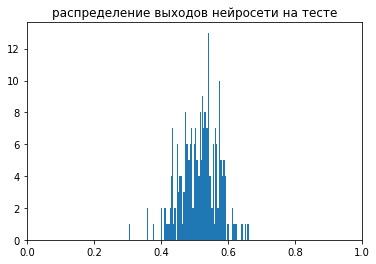

In [75]:
score(new_model, X_train, Y_train, "Train")
score(new_model, X_test, Y_test, "Test")

plt.hist(new_model.predict(X_test), bins=100)
plt.xlim((0,1))
plt.title('распределение выходов нейросети на тесте')
plt.show()

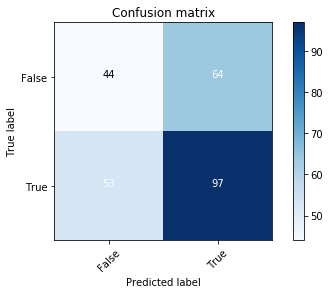

In [76]:
plot_confusion_matrix(metrics.confusion_matrix(Y_test,new_model.predict_classes(X_test)), classes=['False', 'True'])

#### Качество классификации по основным метрикам немножко упало, однако теперь модель более равномерно распределяет классы, не используя факт несбалансированности  выборки

## Сдача домашнего задания

Дедлайн сдачи домашнего задания:  23:59 22.03.2018. Каждый день просрочки дедлайна штрафуется -1 баллом.

Результаты домашнего задания должны быть оформлены в виде отчета в jupyter notebook.
Нормальный отчёт должен включать в себя:
* Краткую постановку задачи и формулировку задания
* Описание минимума необходимой теории и/или описание используемых инструментов 
* Подробный пошаговый рассказ о проделанной работе
* **Аккуратно** оформленные результаты
* Подробные и внятные ответы на все заданные вопросы 
* Внятные выводы – не стоит относится к домашнему заданию как к последовательности сугубо технических шагов, а стоит относится скорее как к небольшому практическому исследованию, у которого есть своя цель и свое назначение.

Задание выполняется в группе до трех человек. Не забудьте перечислить фамилии всех, кто работал над домашнем задании, в jupyter notebook.  

В случае использования какого-либо строннего источника информации обязательно дайте на него ссылку (поскольку другие тоже могут на него наткнуться). Плагиат наказывается нулём баллов за задание и предвзятым отношением в будущем.


При возникновении проблем с выполнением задания обращайтесь с вопросами к преподавателю по семинарским занятиям в вашей группе или у учебным ассистентам.

Учебный ассистент по ДЗ 2: Таисия Глушкова (email: glushkovato@gmail.com, telegram: @glushkovato).


Небрежное оформление отчета существенно отразится на итоговой оценке. Весь код из отчёта должен быть воспроизводимым, если для этого нужны какие-то дополнительные действия, установленные модули и т.п. — всё это должно быть прописано в отчете в явном виде.

Сдача отчетов осуществляется через систему AnyTask.

